## Imports

In [12]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import os
from datetime import datetime
import spacy

# Loading the data

In [13]:

# Get the current date
current_date = datetime.now()

# Initialize an empty list to store dataframes
dataframes = []

# Iterate through the dates from the 25th to the current date
for day in range(25, 31):
    filename = f"posts_Conservative_hot-2025-04-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        dataframes.append(df)

for day in range(1, current_date.day + 1):
    filename = f"posts_Conservative_hot-2025-05-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        dataframes.append(df)

# Combine all dataframes into one
if dataframes:
    combined_post_Conservative = pd.concat(dataframes, ignore_index=True)
else:
    combined_post_Conservative = pd.DataFrame()  # Empty dataframe if no files are found
    print("No files found")

combined_post_Conservative

,Title,URL,Date,Score,Author,num_comments,identifier
0,Trump to Putin: STOP! Let’s get the Peace Deal...,https://i.redd.it/xgb00fz86swe1.jpeg,2025-04-24T07:58:43,7067,f1sh98,1374,Trump_to_Putin__STOP---20250424_075843
1,"Trump releases ""Trump 2028"" merchandise",https://www.trumpstore.com/,2025-04-24T20:24:38,489,Simp4M0105,256,Trump_releases__Trum---20250424_202438
2,Russia Hits Ukrainian Capital With Worst Bombi...,https://www.dailywire.com/news/russia-hits-ukr...,2025-04-24T13:17:33,1093,TheClintonHitList,156,Russia_Hits_Ukrainia---20250424_131733
3,Trump-appointed judge orders administration to...,https://www.foxnews.com/politics/trump-appoint...,2025-04-24T15:05:40,701,Long_Jelly_9557,45,Trump-appointed_judg---20250424_150540
4,Judge Juan Cano and wife arrested for harborin...,https://x.com/EndWokeness/status/1915542422651...,2025-04-24T18:39:13,305,Kern_system,18,Judge_Juan_Cano_and_---20250424_183913
...,...,...,...,...,...,...,...
1395,Brother of Pope Leo XIV says he was an ‘angel’...,https://www.foxnews.com/video/6372624004112,2025-05-10T08:59:44,6,RightWingNest,0,Brother_of_Pope_Leo_---20250510_085944
1396,"Trump says tax raises are ‘good politics,’ dis...",https://www.foxnews.com/politics/trump-says-ta...,2025-05-09T18:49:00,80,RightWingNest,36,Trump_says_tax_raise---20250509_184900
1397,Jen Psaki's new MSNBC show tanks with key demo...,https://nypost.com/2025/05/10/us-news/jen-psak...,2025-05-10T09:40:19,5,M_i_c_K,0,Jen_Psaki's_new_MSNB---20250510_094019
1398,"Trump Calls For China To Open Its Markets, Flo...",https://www.dailywire.com/news/trump-calls-for...,2025-05-09T11:18:22,293,TheClintonHitList,24,Trump_Calls_For_Chin---20250509_111822


In [14]:
# Initialize an empty list to store comments dataframes
comments_dataframes = []

# Iterate through the 'identifier' column in the combined_df
for identifier in combined_post_Conservative['identifier']:
    comment_file = os.path.join("post_comments", f"{identifier}.csv")
    if os.path.exists(comment_file):
        comments_df = pd.read_csv(comment_file)
        comments_dataframes.append(comments_df)

# Combine all comments dataframes into one
if comments_dataframes:
    combined_comments_df = pd.concat(comments_dataframes, ignore_index=True)
else:
    combined_comments_df = pd.DataFrame()  # Empty dataframe if no comment files are found

combined_comments_df

,Comment,Author,Date,Score
0,"""Stop Vlad this isn't you!""",snusboi,2025-04-24T12:04:56,1018
1,We should send JD Vance to shake his hand.,IVcrushonYou,2025-04-24T08:44:31,3188
2,Until someone stops pussyfooting around this w...,EliteJassassin101,2025-04-24T11:21:39,1518
3,"Russia doesn't want peace, it wants Ukraine, a...",cathbadh,2025-04-24T14:59:41,1370
4,He forgot to @ him :(,bearcatjoe,2025-04-24T08:13:20,1897
...,...,...,...,...
20194,[deleted],[deleted],2025-05-09T20:37:40,-8
20195,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6
20196,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13
20197,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2


In [15]:
combined_comments_df["Author"].value_counts()

Author
[deleted]              591
Sure-Wishbone-4293     429
ComputerRedneck        332
kaytin911              224
ITrCool                190
                      ... 
Normal_Saline_           1
AlanSmithee23            1
lion1321                 1
Umngmc                   1
Both-Dimension-3940      1
Name: count, Length: 2109, dtype: int64

In [16]:
# Remove rows where the comment or user has been deleted
combined_comments_df = combined_comments_df[combined_comments_df["Author"] != "[deleted]"]

combined_comments_df

,Comment,Author,Date,Score
0,"""Stop Vlad this isn't you!""",snusboi,2025-04-24T12:04:56,1018
1,We should send JD Vance to shake his hand.,IVcrushonYou,2025-04-24T08:44:31,3188
2,Until someone stops pussyfooting around this w...,EliteJassassin101,2025-04-24T11:21:39,1518
3,"Russia doesn't want peace, it wants Ukraine, a...",cathbadh,2025-04-24T14:59:41,1370
4,He forgot to @ him :(,bearcatjoe,2025-04-24T08:13:20,1897
...,...,...,...,...
20193,I’m more interested in the astronomical wealth...,virgothesixth,2025-05-09T20:44:13,4
20195,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6
20196,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13
20197,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2


In [17]:
combined_comments_df['Score'] = combined_comments_df['Score'].astype(int)

/tmp/ipykernel_1184/595504052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_df['Score'] = combined_comments_df['Score'].astype(int)


In [18]:
combined_comments_df.nsmallest(10, "Score")

,Comment,Author,Date,Score
491,He can't be ELECTED as president again. But he...,cakebreaker2,2025-04-24T17:15:50,-969
2978,He can't be ELECTED as president again. But he...,cakebreaker2,2025-04-24T17:15:50,-969
493,"Vance / Trump 2028, baby!",slayer_of_idiots,2025-04-24T16:25:12,-740
2980,"Vance / Trump 2028, baby!",slayer_of_idiots,2025-04-24T16:25:12,-740
14831,"Posted about an hour ago, + 294 Karma. The **p...",cliffotn,2025-05-07T11:12:19,-717
17234,"Posted about an hour ago, + 294 Karma. The **p...",cliffotn,2025-05-07T11:12:19,-717
14829,I’m going to type the same thing to you guys. ...,cliffotn,2025-05-07T11:59:04,-710
17232,I’m going to type the same thing to you guys. ...,cliffotn,2025-05-07T11:59:04,-710
489,"Yeah, if he tries to do it. Shitposting hat is...",jonnio2215,2025-04-24T15:41:24,-648
2976,"Yeah, if he tries to do it. Shitposting hat is...",jonnio2215,2025-04-24T15:41:24,-648


Clearly some comments on the subreddit are not particularly representative of the views held... That said they're probably a decently small proportion, and it's possible the language used in these comments is still different here than elsewhere, so we leave them in. Any pruning of these comments would be fairly arbitrary anyways. 

In [19]:
# Initialize an empty list to store dataframes for r/democrats posts
democrats_dataframes = []

# Iterate through the dates from the 25th to the current date
for day in range(25, 31):
    filename = f"posts_Democrats_hot-2025-04-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        democrats_dataframes.append(df)

for day in range(1, current_date.day + 1):
    filename = f"posts_Democrats_hot-2025-05-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        democrats_dataframes.append(df)


# Combine all dataframes into one
if democrats_dataframes:
    combined_post_Democrats = pd.concat(democrats_dataframes, ignore_index=True)
else:
    combined_post_Democrats = pd.DataFrame()  # Empty dataframe if no files are found

combined_post_Democrats

,Title,URL,Date,Score,Author,num_comments,identifier
0,Doxing & calls for violence are strickly forbi...,https://www.reddit.com/r/democrats/comments/1i...,2025-02-04T19:50:34,122,backpackwayne,0,Doxing_&_calls_for_v---20250204_195034
1,Trump announces his unconstitutional 2028 run ...,https://i.redd.it/8okn2fydjtwe1.jpeg,2025-04-24T12:34:08,7591,International-Drag23,536,Trump_announces_his_---20250424_123408
2,Double checked this is real 🙃,https://i.redd.it/ncu0pse2wswe1.jpeg,2025-04-24T10:23:25,3852,Unlikely-Cut2696,569,Double_checked_this_---20250424_102325
3,"It’s true. Whenever I see any red hat, I shutt...",https://i.redd.it/hy6mrq5yivwe1.jpeg,2025-04-24T19:15:14,697,uselessZZwaste,7,It’s_true._Whenever_---20250424_191514
4,Can I just say … I’m loving Rachel Maddow toni...,https://i.redd.it/dq665o0dqwwe1.jpeg,2025-04-24T23:18:34,210,Unhappy_Cress5111,12,Can_I_just_say_…_I’m---20250424_231834
...,...,...,...,...,...,...,...
1395,Bless their heart,https://i.redd.it/6yz0n0d21fze1.jpeg,2025-05-07T14:58:54,123,MaximusDM22,2,Bless_their_heart---20250507_145854
1396,WATCH: Rep. Pressley pushes Bessent to get rid...,https://www.youtube.com/watch?v=Ih6iZf07IQM,2025-05-07T15:01:51,92,shallah,7,WATCH__Rep._Pressley---20250507_150151
1397,Grifters thrive under Trump’s scam-friendly ad...,https://www.theverge.com/policy/662109/trump-w...,2025-05-07T13:16:01,111,Peteostro,6,Grifters_thrive_unde---20250507_131601
1398,Joe Biden slams Trump for 'foolish' appeasemen...,https://www.nbcnews.com/politics/joe-biden/joe...,2025-05-07T07:05:24,340,progress18,7,Joe_Biden_slams_Trum---20250507_070524


In [21]:
# Initialize an empty list to store comments dataframes for r/democrats posts
democrats_comments_dataframes = []

# Iterate through the 'identifier' column in the combined_post_Democrats dataframe
for identifier in combined_post_Democrats['identifier']:
    comment_file = os.path.join("post_comments", f"{identifier}.csv")
    if os.path.exists(comment_file):
        comments_df = pd.read_csv(comment_file)
        democrats_comments_dataframes.append(comments_df)

# Combine all comments dataframes into one
if democrats_comments_dataframes:
    combined_comments_Democrats = pd.concat(democrats_comments_dataframes, ignore_index=True)
else:
    combined_comments_Democrats = pd.DataFrame()  # Empty dataframe if no comment files are found

combined_comments_Democrats

,Comment,Author,Date,Score
0,https://preview.redd.it/gzhum80jmtwe1.jpeg?wid...,PretendMud8714,2025-04-24T12:51:47,251
1,He should have been thrown in a cell ten minut...,Voltage_Z,2025-04-24T12:37:22,2039
2,Hopefully the lord will take him before that.,SadPhase2589,2025-04-24T12:54:02,415
3,Commenting and upvoting for attention. MAGA bo...,ExplicitDrift,2025-04-24T12:54:00,278
4,Where I can get an Obama 2028 hat?,bundesrepu,2025-04-24T12:49:05,346
...,...,...,...,...
53708,Please approve of a private company's spy sate...,Same_Net2953,2025-05-07T17:42:31,1
53709,It's a beautiful thing up there in the sky it ...,SteelPumpkin75,2025-05-07T17:42:49,1
53710,How tf is this even legal,Formal-Hawk9274,2025-05-07T19:35:32,1
53711,No he means the ones that are blocking out the...,WestsideBuppie,2025-05-07T21:25:38,2


In [22]:
combined_comments_Democrats["Author"].value_counts()

Author
[deleted]             821
Rosebunse             307
LivingIndependence    303
Lebarican22           273
ms_directed           250
                     ... 
infolink324             1
Ok_Awareness5517        1
cornham                 1
taisynn                 1
BlaqJaq                 1
Name: count, Length: 7726, dtype: int64

Many deleted comments again.

In [23]:
combined_comments_Democrats = combined_comments_Democrats[combined_comments_Democrats["Author"] != "[deleted]"]

In [24]:
combined_comments_Democrats['Score'] = combined_comments_Democrats['Score'].astype(int)
combined_comments_Democrats.nsmallest(10, "Score")

/tmp/ipykernel_1184/230943820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_Democrats['Score'] = combined_comments_Democrats['Score'].astype(int)


,Comment,Author,Date,Score
40324,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
43829,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
47338,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
42738,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
46247,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
50426,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
10438,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
15998,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
23173,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
11051,Comedy news ruined America,Thumbkeeper,2025-04-26T13:11:59,-38


Strangely, despite having many more comments, our sample from r/Democrats does not include nearly the same type of extremely downvoted comment as the ones from r/Conservative. Unusual for sure, but again we will just observe the difference, not arbitrarily prune highly disliked comments.

### Correcting class imbalance

In [25]:
# Sample comments from the Democrat comments dataframe
sampled_democrat_comments = combined_comments_Democrats.sample(n=len(combined_comments_df), random_state=69420) #comical random state, I know

# Add a new column to label the subreddit
sampled_democrat_comments['Subreddit'] = 'Democrats'
combined_comments_df['Subreddit'] = 'Conservative'

# Combine the two dataframes
combined_comments = pd.concat([sampled_democrat_comments, combined_comments_df], ignore_index=True)

combined_comments

/tmp/ipykernel_1184/3466954145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_df['Subreddit'] = 'Conservative'


,Comment,Author,Date,Score,Subreddit
0,Strong suspicion is most “supporters” are bots...,freedinthe90s,2025-05-06T08:30:45,2,Democrats
1,That's not deportation. That's human trafficking.,Careful-Committee-96,2025-05-03T19:42:14,2,Democrats
2,Anything to distract from the incoming recession,lovely_orchid_,2025-05-04T20:19:15,6,Democrats
3,And so many people said not to take it seriously,kerryfinchelhillary,2025-05-07T11:08:47,8,Democrats
4,The only answer to that question that I can th...,Big_Salt371,2025-05-09T14:28:04,1,Democrats
...,...,...,...,...,...
39211,I’m more interested in the astronomical wealth...,virgothesixth,2025-05-09T20:44:13,4,Conservative
39212,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6,Conservative
39213,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13,Conservative
39214,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2,Conservative


In [31]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

language_model = spacy.load("en_core_web_sm")

#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

# Lemmmatizing thousands of comments miiiiight take a little bit...
combined_comments["cleaned_comment"] = combined_comments["Comment"].apply(clean)
combined_comments["lemmatized_comment"] = combined_comments["cleaned_comment"].apply(lemmatize)

In [32]:
from sklearn.model_selection import train_test_split
X = combined_comments["cleaned_comment"]
y = combined_comments["Subreddit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23401924)

y_train.value_counts()

Subreddit
Conservative    15814
Democrats       15558
Name: count, dtype: int64

Random sample at this size is roughly class-balanced.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer

pipeline = Pipeline(steps=[
    ("bag_of_words", CountVectorizer()),
    ("term_frequency_idf", TfidfTransformer()),
    ("model", MultinomialNB())
])

param_grid = {"bag_of_words__max_features": [1000, 5000, 10000, 20000, 30000], "term_frequency_idf__norm":["l1", "l2"],
              "model__alpha": [0.01, 0.1, 1, 5, 10, 100]}

model = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_log_loss", n_jobs=-1)
model.fit(X_train, y_train)

model = CalibratedClassifierCV(model.best_estimator_, method="sigmoid", cv=5)
model.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('bag_of_words',
                                                  CountVectorizer(max_features=30000)),
                                                 ('term_frequency_idf',
                                                  TfidfTransformer()),
                                                 ('model',
                                                  MultinomialNB(alpha=0.1))]))

In [34]:
from sklearn.metrics import accuracy_score, log_loss, brier_score_loss, classification_report

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba[:, 1], pos_label='Democrats')

print(f"{'Metric':<20}{'Value':<10}")
print("-" * 30)
print(f"{'Accuracy':<20}{accuracy:<10.4f}")
print(f"{'Log Loss':<20}{logloss:<10.4f}")
print(f"{'Brier Score':<20}{brier_score:<10.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=model.classes_))

Metric              Value     
------------------------------
Accuracy            0.7852    
Log Loss            0.4481    
Brier Score         0.1458    

Classification Report:
              precision    recall  f1-score   support

Conservative       0.78      0.78      0.78      3794
   Democrats       0.79      0.79      0.79      4050

    accuracy                           0.79      7844
   macro avg       0.78      0.78      0.78      7844
weighted avg       0.79      0.79      0.79      7844



In [36]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


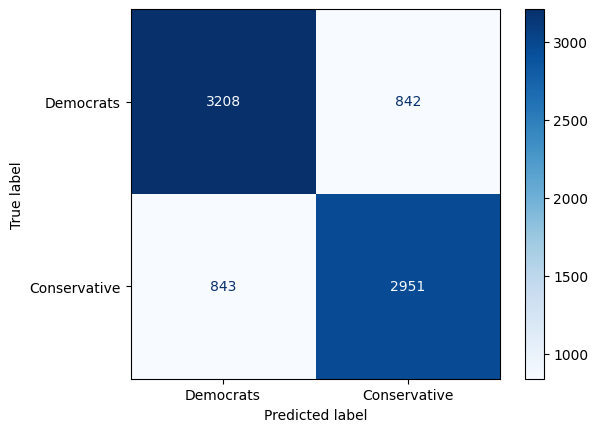

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Democrats', 'Conservative'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Democrats', 'Conservative'])
disp.plot(cmap='Blues')

Errors are quite balanced. Type 1 and type 2 errors are essentially equally common. 

In [41]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


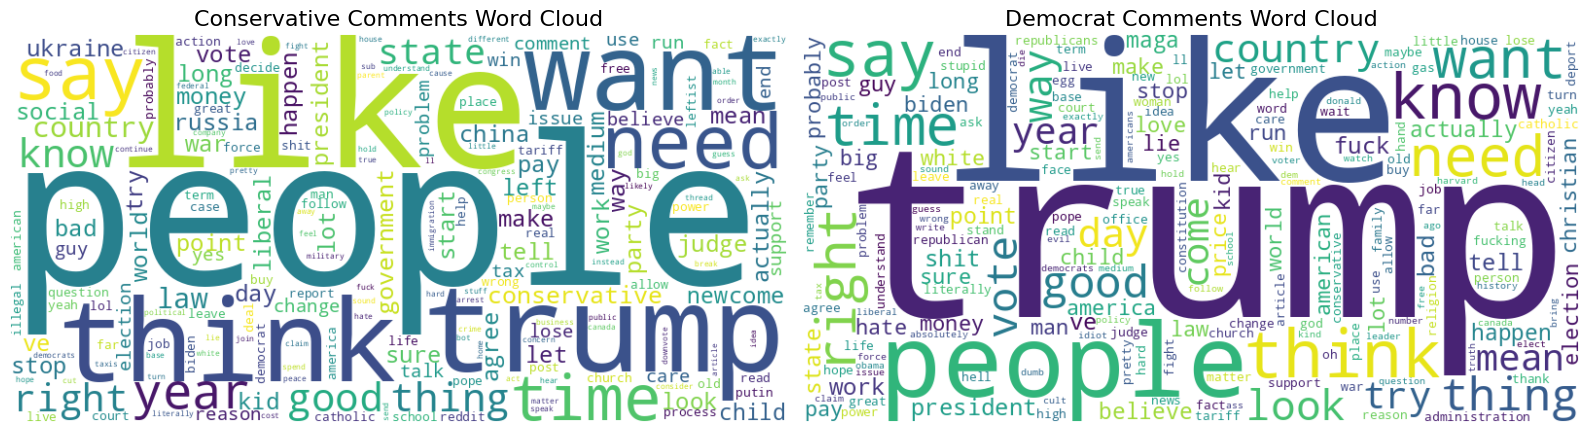

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

conservative_comments = combined_comments[combined_comments['Subreddit'] == 'Conservative']['lemmatized_comment']
democrat_comments = combined_comments[combined_comments['Subreddit'] == 'Democrats']['lemmatized_comment']

vectorizer_conservative = CountVectorizer(max_features=1000, stop_words='english')
vectorizer_democrat = CountVectorizer(max_features=1000, stop_words='english')

conservative_bow = vectorizer_conservative.fit_transform(conservative_comments)
democrat_bow = vectorizer_democrat.fit_transform(democrat_comments)

conservative_word_freq = dict(zip(vectorizer_conservative.get_feature_names_out(), conservative_bow.toarray().sum(axis=0)))
democrat_word_freq = dict(zip(vectorizer_democrat.get_feature_names_out(), democrat_bow.toarray().sum(axis=0)))

conservative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conservative_word_freq)
democrat_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(democrat_word_freq)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(conservative_wordcloud, interpolation='bilinear')
plt.title('Conservative Comments Word Cloud', fontsize=16)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(democrat_wordcloud, interpolation='bilinear')
plt.title('Democrat Comments Word Cloud', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

In [58]:
conservativewords = ["trump", "gop", "conservative", "right", "red", "maga", "rnc", "right-wing", "republican", "republicans"]
democratwords = ["biden", "harris", "obama","democrat", "democrats", "dnc", "liberal", "leftist", "left", "blue"]

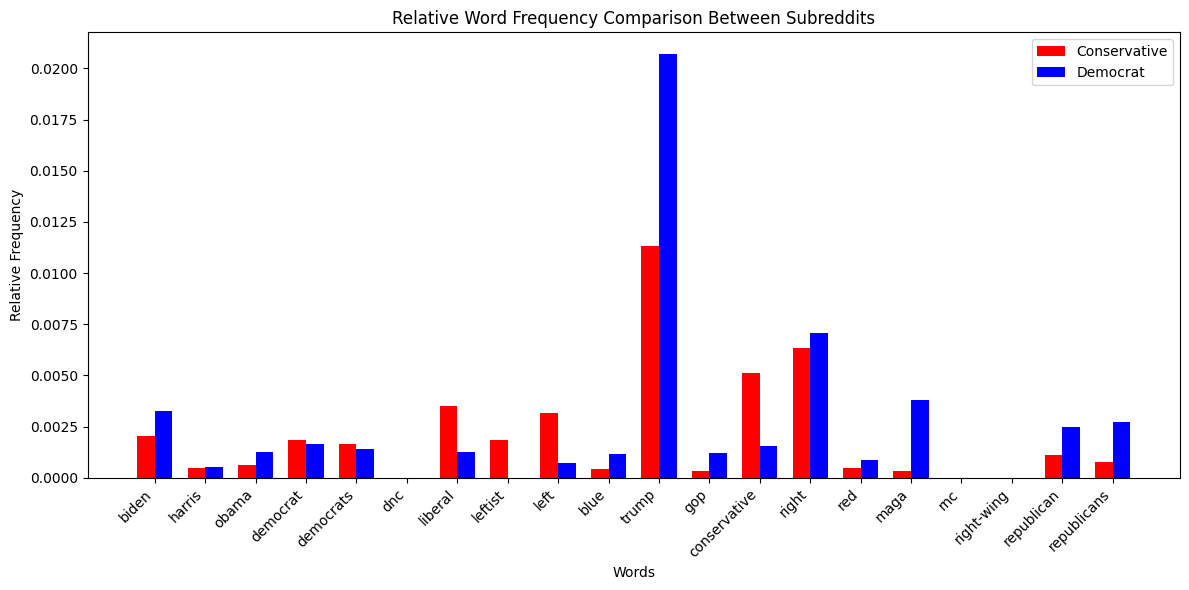

In [59]:
import numpy as np
all_words = democratwords+conservativewords

x = np.arange(len(all_words))  # Assuming all_words is a list of words
width = 0.35

total_conservative_words = sum(conservative_word_freq.values())
total_democrat_words = sum(democrat_word_freq.values())

relative_conservative_frequencies = [conservative_word_freq.get(word, 0) / total_conservative_words for word in all_words]
relative_democrat_frequencies = [democrat_word_freq.get(word, 0) / total_democrat_words for word in all_words]
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, relative_conservative_frequencies, width, label='Conservative', color='red')
bars2 = ax.bar(x + width/2, relative_democrat_frequencies, width, label='Democrat', color='blue')

ax.set_xlabel('Words')
ax.set_ylabel('Relative Frequency')
ax.set_title('Relative Word Frequency Comparison Between Subreddits')
ax.set_xticks(x)
ax.set_xticklabels(all_words, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


the model we are about to use is a bit larger than the one we covered in class, in order to extend the context window. A GPU might be necessary to do all of the sentiment analysis efficiently. 

In [45]:
import torch
print(torch.cuda.is_available())
print(torch.version.hip) 

True
6.1.40093-bd86f1708


In [47]:
%pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 50.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [transformers] [transformers]
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Use a pipeline as a high-level helper
from transformers import pipeline

sentiment_pipeline = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

# Get all cleaned comments as a list (truncate to 512 chars)
texts = combined_comments["cleaned_comment"].str[:512].tolist()

# Run the model on the whole list
results = sentiment_pipeline(texts, batch_size=128)

# Extract just the label
sentiments = [r["label"] for r in results]

# Add it to the DataFrame
combined_comments["sentiment"] = sentiments

Device set to use cuda:0


In [51]:
combined_comments["sentiment"].value_counts()

sentiment
LABEL_0    20871
LABEL_1    15240
LABEL_2     3105
Name: count, dtype: int64

In [52]:
# Replace sentiment labels
combined_comments["sentiment"] = combined_comments["sentiment"].replace({
    "LABEL_0": "NEG",
    "LABEL_1": "NEU",
    "LABEL_2": "POS"
})

combined_comments["sentiment"].value_counts()

sentiment
NEG    20871
NEU    15240
POS     3105
Name: count, dtype: int64

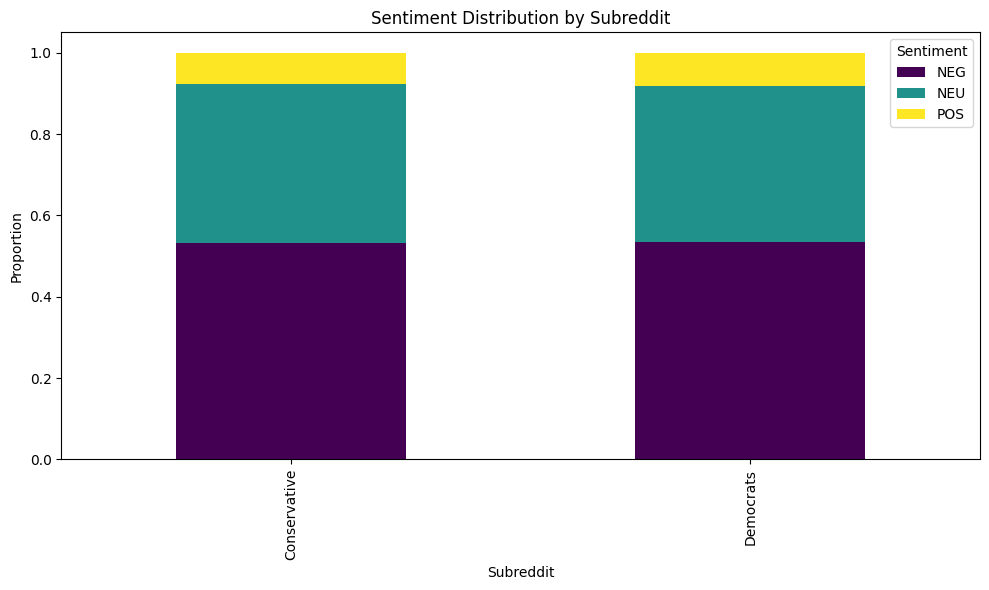

In [60]:
import matplotlib.pyplot as plt

# Calculate the normalized value counts
sentiment_distribution = combined_comments.groupby("Subreddit")["sentiment"].value_counts(normalize=True).unstack()

# Plot the bar chart
sentiment_distribution.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')

plt.title("Sentiment Distribution by Subreddit")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

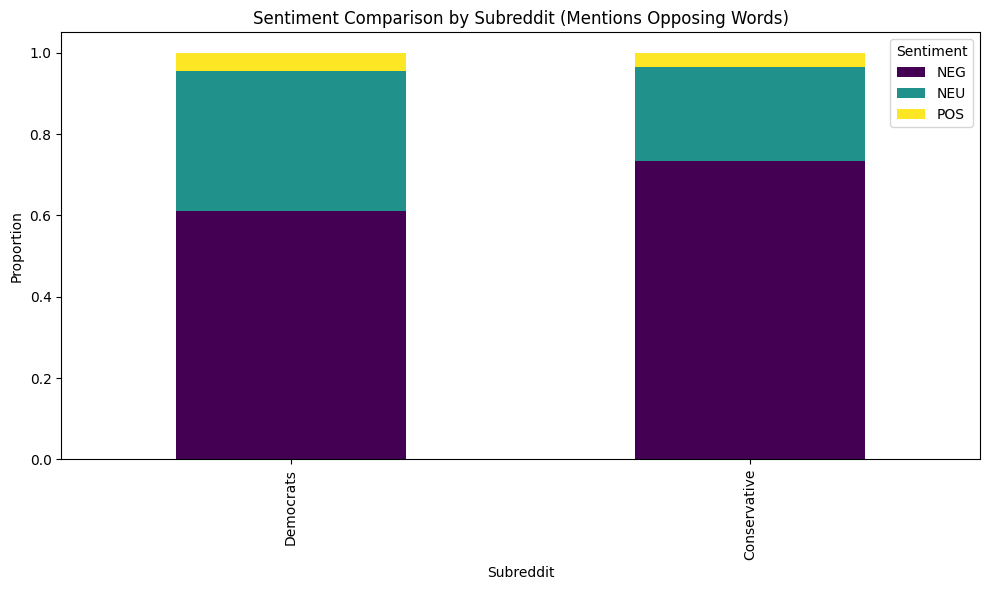

In [61]:
import matplotlib.pyplot as plt

# Filter comments mentioning conservativewords in the Democrat subreddit
democrat_mentions_conservativewords = combined_comments[
    (combined_comments['Subreddit'] == 'Democrats') &
    (combined_comments['lemmatized_comment'].str.contains('|'.join(conservativewords), case=False))
]

# Filter comments mentioning democratwords in the Conservative subreddit
conservative_mentions_democratwords = combined_comments[
    (combined_comments['Subreddit'] == 'Conservative') &
    (combined_comments['lemmatized_comment'].str.contains('|'.join(democratwords), case=False))
]

# Calculate sentiment frequencies for each group
democrat_sentiment_counts = democrat_mentions_conservativewords['sentiment'].value_counts(normalize=True)
conservative_sentiment_counts = conservative_mentions_democratwords['sentiment'].value_counts(normalize=True)



# Combine sentiment counts into a single DataFrame for stacked bar chart
sentiment_comparison = pd.DataFrame({
    'Democrats': democrat_sentiment_counts,
    'Conservative': conservative_sentiment_counts
}).T

# Plot the stacked bar chart
sentiment_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Sentiment Comparison by Subreddit (Mentions Opposing Words)")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [56]:
%pip install gensim

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.8 MB/s eta 0:00:00a 0:00:01
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 41.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: scipy━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: scipy 1.15.3 0/3 [numpy]
    Uninstalling scipy-1.15.3:━━━━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled scipy-1.15.3━ 0/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]2m2/3 [gensim]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts

In [57]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(combined_comments['lemmatized_comment'])

corpus = Sparse2Corpus(bag_of_words, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

lda_model.print_topics()

[(0,
  '0.043*"taxis" + 0.027*"government" + 0.024*"year" + 0.020*"not" + 0.017*"check" + 0.017*"run" + 0.017*"remember" + 0.016*"child" + 0.015*"market" + 0.014*"rate"'),
 (1,
  '0.023*"illegal" + 0.023*"not" + 0.019*"time" + 0.015*"work" + 0.014*"land" + 0.013*"eat" + 0.012*"joke" + 0.011*"clearly" + 0.011*"cash" + 0.011*"nice"'),
 (2,
  '0.058*"catholic" + 0.056*"pope" + 0.039*"reddit" + 0.021*"church" + 0.020*"yes" + 0.018*"american" + 0.017*"exactly" + 0.017*"get" + 0.013*"not" + 0.012*"bad"'),
 (3,
  '0.034*"not" + 0.028*"people" + 0.018*"like" + 0.017*"believe" + 0.013*"right" + 0.013*"love" + 0.011*"crime" + 0.010*"religion" + 0.010*"hate" + 0.009*"cheap"'),
 (4,
  '0.033*"kid" + 0.031*"lose" + 0.024*"year" + 0.019*"parent" + 0.018*"have" + 0.017*"number" + 0.016*"ok" + 0.015*"answer" + 0.015*"expect" + 0.014*"not"'),
 (5,
  '0.075*"go" + 0.035*"not" + 0.033*"russia" + 0.023*"hear" + 0.022*"stop" + 0.021*"to" + 0.016*"trump" + 0.016*"get" + 0.015*"war" + 0.014*"want"'),
 (6,
  